# Deep Learning week - Day 3 - Google Colab


### Exercise objetives
- Train a CNN on Google Colab to speed up the model convergence
- Design a CNN architecture on your own

<hr>
<hr>

For CNN, the training time of each epochs highly depends on : 
- the network architecture
- the number of input data (which increases in case of data augmentation)
- the shape of each image

We have seen that even quite small images and standard achitectures lead to very long computational time. This is because the neural network are (by default) run on your CPU. On the other hand, GPUs can compute large operations in parallel, which is what we are interested in as within each batch, it is theoretically possible to compute the transformation of all the images in parallel (on the contrary, the backpropagation has to be done on all the images in the same time, so no real parallelization here). Let's use Google Colab to accelerate the model convergence thanks to Google GPUs.



# Google Colab


Google Colab is nothing more than a way to have online notebooks, with the possibility to use Google GPUs. The idea here is not to use it in production (as there are some limitations) but to use Google Colab to test and prototype new algorithms. This free access to GPU allows you to accelerate the computational time. 

So the first task is to open the notebook you are reading on Google Colab. To do so: 
- Open Google Colab [here](https://colab.research.google.com/)
- Import a Notebook and select this file, the one you are currently reading.
- Once open, you are now running a similar Notebook but in Google Colab.
- **Change the runtime type to GPU (Go in Execution > Change the execution type).**

Welcome to Google Colab! Do not forget that you can open any notebook in Google Colab (but it is not always worth it and working on your computer might be enough for many tasks - however, with images, we recommand to do it on Google Colab. Moreover, we will mention the exercises that are preferably done on Colab during the week).



# Data loading & Preprocessing

You have two options to load the data on Google Colab.


### Option 1: Loading the data directly 

You can first get the data onto google Colab thanks to:

`!wget https://wagon-public-datasets.s3.amazonaws.com/flowers-dataset.zip`,

and then run 

`!unzip flowers-dataset.zip`

This is a very easy option to load the data into your working directory.


### Option 2: Adding the data to Google Drive.

You can first download the data  from `https://wagon-public-datasets.s3.amazonaws.com/flowers-dataset.zip`. Then you have to add them to your Google Drive in a folder called `Deep_learning_data` (for instance) and run the following code in the notebook.: 

```
from google.colab import drive
drive.mount('/content/drive/')
```

The previous code will ask you to go to a given webpage where you copy the link and past it in the Colab form that will appear. Do so to load the data on Google Colab.

<hr>
<hr>

### In practice, option 1 or option 2?

Why choosing this option over the first one? This can be of interest if you work in a project team, and update the data from time to time. By doing this, you can share the same data folder within a team, and be sure that everyone has the same at any time, even though someone changes it. The drawback is that Google Colab has now access to your Google Folder, which you might not be or not in favor of, depending on your sensibility.

❓ **Question** ❓ Use one of the above method to load your data. 

!wget https://wagon-public-datasets.s3.amazonaws.com/flowers-dataset.zip

In [3]:
!wget https://wagon-public-datasets.s3.amazonaws.com/flowers-dataset.zip

--2020-11-18 14:17:12--  https://wagon-public-datasets.s3.amazonaws.com/flowers-dataset.zip
Resolving wagon-public-datasets.s3.amazonaws.com (wagon-public-datasets.s3.amazonaws.com)... 52.218.84.169
Connecting to wagon-public-datasets.s3.amazonaws.com (wagon-public-datasets.s3.amazonaws.com)|52.218.84.169|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 104983809 (100M) [application/zip]
Saving to: ‘flowers-dataset.zip’

flowers-dataset.zip 100%[===================>] 100.12M  11.8MB/s    in 10s     

2020-11-18 14:17:23 (9.72 MB/s) - ‘flowers-dataset.zip’ saved [104983809/104983809]



In [ ]:
!unzip flowers-dataset.zip

❓ **Question** ❓ Depending on the `loading_method` you have used, load the data and store them in the appropriate variables.

In [9]:
!ls

flowers  flowers-dataset.zip  sample_data


from tensorflow.keras.utils import to_categorical
from tqdm import tqdm
import numpy as np
import osddd
from PIL import Image

def load_flowers_data(loading_method):
    if loading_method == 'colab':
        data_path = '/content/drive/My Drive/Deep_learning_data/flowers'
    elif loading_method == 'direct':
        data_path = 'flowers/'
    classes = {'daisy':0, 'dandelion':1, 'rose':2}
    imgs = []
    labels = []
    for (cl, i) in classes.items():
        images_path = [elt for elt in os.listdir(os.path.join(data_path, cl)) if elt.find('.jpg')>0]
        for img in tqdm(images_path[:300]):
            path = os.path.join(data_path, cl, img)
            if os.path.exists(path):
                image = Image.open(path)
                image = image.resize((256, 256))
                imgs.append(np.array(image))
                labels.append(i)

    X = np.array(imgs)
    num_classes = len(set(labels))
    y = to_categorical(labels, num_classes)

    # Finally we shuffle:
    p = np.random.permutation(len(X))
    X, y = X[p], y[p]

    first_split = int(len(imgs) /6.)
    second_split = first_split + int(len(imgs) * 0.2)
    X_test, X_val, X_train = X[:first_split], X[first_split:second_split], X[second_split:]
    y_test, y_val, y_train = y[:first_split], y[first_split:second_split], y[second_split:]
    
    return X_train, y_train, X_val, y_val, X_test, y_test, num_classes


# YOUR CODE HERE

In [10]:
from tensorflow.keras.utils import to_categorical
from tqdm import tqdm
import numpy as np
import os
from PIL import Image

def load_flowers_data(loading_method):
    if loading_method == 'colab':
        data_path = '/content/drive/My Drive/Deep_learning_data/flowers'
    elif loading_method == 'direct':
        data_path = 'flowers/'
    classes = {'daisy':0, 'dandelion':1, 'rose':2}
    imgs = []
    labels = []
    for (cl, i) in classes.items():
        images_path = [elt for elt in os.listdir(os.path.join(data_path, cl)) if elt.find('.jpg')>0]
        for img in tqdm(images_path[:300]):
            path = os.path.join(data_path, cl, img)
            if os.path.exists(path):
                image = Image.open(path)
                image = image.resize((256, 256))
                imgs.append(np.array(image))
                labels.append(i)

    X = np.array(imgs)
    num_classes = len(set(labels))
    y = to_categorical(labels, num_classes)

    # Finally we shuffle:
    p = np.random.permutation(len(X))
    X, y = X[p], y[p]

    first_split = int(len(imgs) /6.)
    second_split = first_split + int(len(imgs) * 0.2)
    X_test, X_val, X_train = X[:first_split], X[first_split:second_split], X[second_split:]
    y_test, y_val, y_train = y[:first_split], y[first_split:second_split], y[second_split:]
    
    return X_train, y_train, X_val, y_val, X_test, y_test, num_classes



In [42]:
X_train, y_train, X_val, y_val, X_test, y_test, num_classes = load_flowers_data('direct')

100%|██████████| 299/299 [00:01<00:00, 233.47it/s]


First things first, let's start by some preprocessing

❓ **Question** ❓ First check that all your images have the same size. How many colors do these images have?

In [43]:
X_train.shape

(571, 256, 256, 3)

❓ **Question** ❓ Plot some images with the `imshow` function of matplotlib.

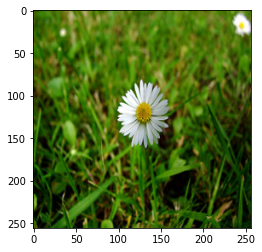

In [44]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

❓ **Question** ❓ Do not forget to normalize the image intensities if necessary

In [45]:
X_train = X_train/255
X_test = X_test/255
X_val = X_val/255

# CNN


❓ **Question** ❓ You have already run multiple CNN over the previous exercises. Here, you are on your own to design its architecture. A good practice is to start by having a very simple architecture. It insures that its running - and if there is a problem, fewer lines are easier to debug. Then, once you have a simple architecture, you can complexify your neural network to improve its performance.

<details>
   <summary>If you are not sure what the simple Neural network would look like, click >>HERE<< </summary>
    <ul>
        <li> A convolution layer with enough filters - choose the kernel size wisely as your data are quite large here</li>
        <li> A Maxpooling layer </li>
        <li> Flatten your output </li>
        <li> Add the last layer accoding to your task</li>
        
</ul>
</details>


<details>
   <summary>If you are not sure what can improve the neural design, click >>HERE<< </summary>
    Usually, Deep learners would do the following (in this order) : 
    <ul>
        <li>Add a dense layer between the flattening and the last layer</li>
        <li>More convolution & pooling layers: you can try 4 or each here</li>
        <li>Change the size of your kernels and potentially other hyperparameters</li>
        <li>Add some regularization (L1, L2 or Dropout) if you feel its overfitting</li>
        <li>The rest is for you to try ;) </li>
    </ul>
</details>


Do not forget to compile it and fit it on the train data (use the `validation_data` with the `X_val` and `y_val` instead of using the `validation_split` argument). Do not forget the early stopping criterion.

In [50]:
from tensorflow.keras import layers
from tensorflow.keras import models

def initialize_model():
    model = models.Sequential()

    model.add(layers.Conv2D(32, kernel_size=(7,7), activation='relu', input_shape=(256, 256, 3), padding='same'))
    model.add(layers.MaxPooling2D(pool_size=(2,2)))
    model.add(layers.Conv2D(64, kernel_size=(4,4), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D(pool_size=(3,3)))
    model.add(layers.Conv2D(128, kernel_size=(3,3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D(pool_size=(3,3)))
    model.add(layers.Flatten())
    model.add(layers.Dense(120, activation='relu'))
    model.add(layers.Dense(60, activation='relu'))
    model.add(layers.Dropout(rate=0.2))
    model.add(layers.Dense(3, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

❓ **Question** ❓ Play a bit with your model to look at the effect of different architectures, especially by:
- changing the number of convolution layers (associated to their maxpooling layer)
- changing the number of filters
- changing the kernel sizes
- changing the padding and strides

In [52]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(patience=5, restore_best_weights=True)
model = initialize_model()
# The fit
history = model.fit(X_train, y_train, 
                        epochs=15, 
                        callbacks=[es], 
                        validation_data=(X_val, y_val),
                       verbose=1)

Epoch 1/15
18/18 [==============================] - 3s 185ms/step - loss: 1.0723 - accuracy: 0.3905 - val_loss: 0.9354 - val_accuracy: 0.5754
Epoch 2/15
18/18 [==============================] - 3s 172ms/step - loss: 0.8969 - accuracy: 0.5587 - val_loss: 0.8028 - val_accuracy: 0.6313
Epoch 3/15
18/18 [==============================] - 3s 172ms/step - loss: 0.8165 - accuracy: 0.6200 - val_loss: 0.7658 - val_accuracy: 0.6648
Epoch 4/15
18/18 [==============================] - 3s 169ms/step - loss: 0.7829 - accuracy: 0.6270 - val_loss: 0.7756 - val_accuracy: 0.7095
Epoch 5/15
18/18 [==============================] - 3s 170ms/step - loss: 0.7156 - accuracy: 0.6690 - val_loss: 0.6994 - val_accuracy: 0.7374
Epoch 6/15
18/18 [==============================] - 3s 171ms/step - loss: 0.6989 - accuracy: 0.7093 - val_loss: 0.7334 - val_accuracy: 0.7430
Epoch 7/15
18/18 [==============================] - 3s 169ms/step - loss: 0.5398 - accuracy: 0.7933 - val_loss: 0.6452 - val_accuracy: 0.7374
Epoch 

In [53]:
model.evaluate(X_test, y_test)

5/5 [==============================] - 0s 44ms/step - loss: 0.6837 - accuracy: 0.7248


[0.6836991310119629, 0.7248322367668152]

In [55]:
from tensorflow.keras import regularizers
reg_l1 = regularizers.l1(0.01)
reg_l2 = regularizers.l2(0.01)
reg_l1_l2 = regularizers.l1_l2(l1=0.005, l2=0.0005)

In [56]:
def initialize_model():
    model = models.Sequential()

    model.add(layers.Conv2D(32, kernel_size=(9,9), activation='relu', input_shape=(256, 256, 3), padding='same'))
    model.add(layers.MaxPooling2D(pool_size=(2,2)))
    model.add(layers.Conv2D(64, kernel_size=(6,6), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D(pool_size=(3,3)))
    model.add(layers.Conv2D(128, kernel_size=(3,3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D(pool_size=(3,3)))
    model.add(layers.Flatten())
    model.add(layers.Dense(120, activation='relu'))
    model.add(layers.Dense(60, activation='relu', kernel_regularizer=reg_l1))
    model.add(layers.Dropout(rate=0.2))
    model.add(layers.Dense(3, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [57]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(patience=5, restore_best_weights=True)
model = initialize_model()
# The fit
history = model.fit(X_train, y_train, 
                        epochs=15, 
                        callbacks=[es], 
                        validation_data=(X_val, y_val),
                       verbose=1)

Epoch 1/15
18/18 [==============================] - 5s 296ms/step - loss: 7.1824 - accuracy: 0.4028 - val_loss: 6.4911 - val_accuracy: 0.4078
Epoch 2/15
18/18 [==============================] - 4s 213ms/step - loss: 5.9465 - accuracy: 0.5254 - val_loss: 5.3713 - val_accuracy: 0.5140
Epoch 3/15
18/18 [==============================] - 4s 213ms/step - loss: 4.9029 - accuracy: 0.5692 - val_loss: 4.4203 - val_accuracy: 0.6480
Epoch 4/15
18/18 [==============================] - 4s 212ms/step - loss: 4.0174 - accuracy: 0.5762 - val_loss: 3.6347 - val_accuracy: 0.6257
Epoch 5/15
18/18 [==============================] - 4s 211ms/step - loss: 3.2930 - accuracy: 0.5902 - val_loss: 2.9556 - val_accuracy: 0.6536
Epoch 6/15
18/18 [==============================] - 4s 211ms/step - loss: 2.5708 - accuracy: 0.6287 - val_loss: 2.2664 - val_accuracy: 0.7039
Epoch 7/15
18/18 [==============================] - 4s 213ms/step - loss: 1.9592 - accuracy: 0.7040 - val_loss: 1.8097 - val_accuracy: 0.7095
Epoch 

In [58]:
model.evaluate(X_test, y_test)

5/5 [==============================] - 1s 112ms/step - loss: 1.5931 - accuracy: 0.6644


[1.593103289604187, 0.6644295454025269]